In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Import and plot variant hotspot data

/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_49590/3153843892.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_out = pd.concat([df_out,df])
/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_49590/3153843892.py:58: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[i,j].set_ylim([0, df_species['Number of mutations'].max()*1.2 ])
/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_49590/3153843892.py:58: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[i,j].set_ylim([0, df_species['Number of mutations'].max()*1.2 ])
/var/folders/fq/63_fsbc110s_4lv0n6kgz4900000gn/T/ipykernel_49590/3153843892.py:58: UserWarning: Attempt to set 

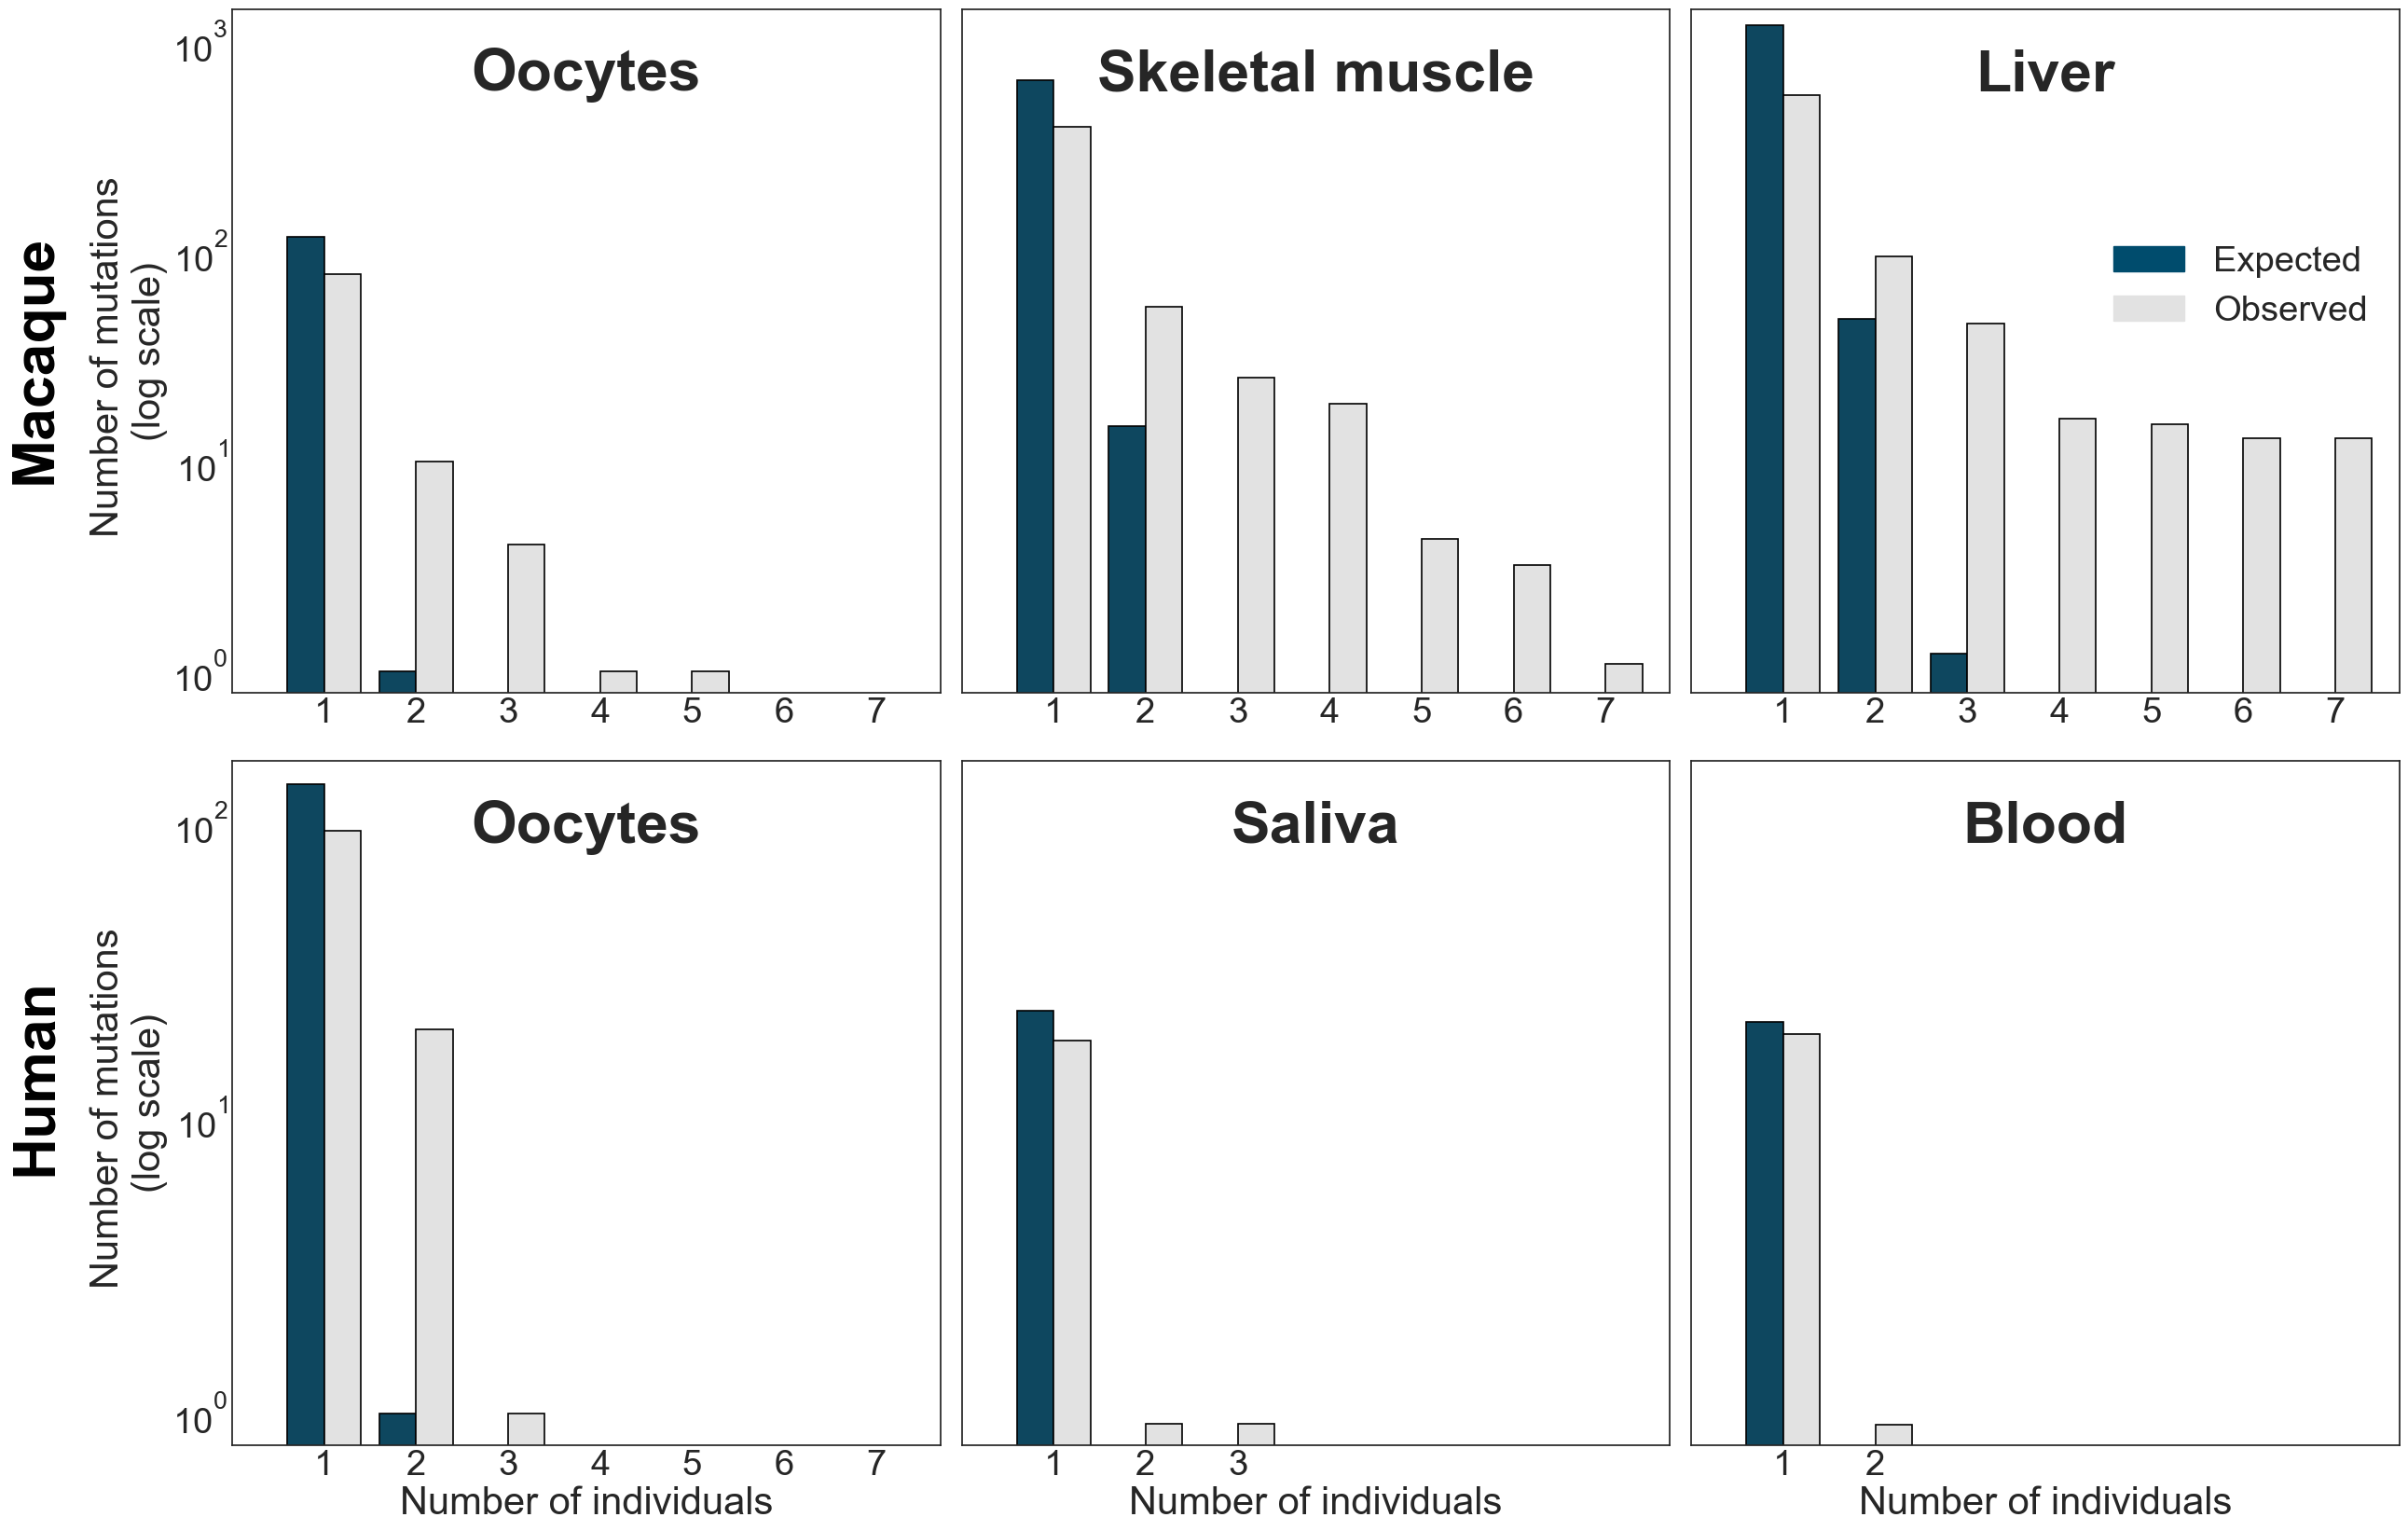

,Species,Tissue,Number of individuals,Expected,Observed
0,Mouse,Oo,1,132.760554,104.0
1,Mouse,Oo,2,1.000000,9.0
2,Mouse,Oo,3,0.000000,4.0
3,Mouse,Oo,4,0.000000,0.0
4,Mouse,Oo,5,0.000000,0.0
...,...,...,...,...,...
166,Human,Sa,1,23.944248,19.0
167,Human,Sa,2,0.000000,1.0
168,Human,Sa,3,0.000000,1.0
169,Human,Bl,1,21.940871,20.0


In [ ]:
def get_var_hotspot_results(alignment='chrM'):
    dict_combos = {'Mouse':['Oo','M','Br'],
                   'Macaque':['Oo','M','Li'],
                   'Human':['Oo','Sa','Bl']}
    df_out = pd.DataFrame(columns=['Species','Tissue','Number of individuals','Expected','Observed'])
    for species in dict_combos.keys():
        for tissue in dict_combos[species]:
            df = pd.read_table(f"variantHotspots/sharedMutations_{alignment}_{species.lower()}_{tissue}.txt")
            df['Species'] = species
            df['Tissue'] = tissue
            df = df.reset_index().rename(columns={'index':'Number of individuals','exp_mut_tot':'Expected','obs_mut_tot':'Observed'})
            df = df.fillna(0)
            df_out = pd.concat([df_out,df])
    return df_out.reset_index(drop=True)


def plot_var_hotspots_results(alignment='chrM', write=True):
    df = get_var_hotspot_results()
    # Change data structure.
    df_melted = df.melt(['Species','Tissue','Number of individuals']).rename(columns={'value':'Number of mutations'})
    # Order of assignments.
    dict_combos = {
                    # 'Mouse':['Oo','M','Br'],
                    'Macaque':['Oo','M','Li'],
                    'Human':['Oo','Sa','Bl']}
    dict_tissues = { 'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
                     'Li':'Liver','Sa':'Saliva','Bl':'Blood' }
    df_melted ['Tissue_name'] = df_melted['Tissue'].map(dict_tissues)

    # Text size (font size) and plot style.
    sns.set(font_scale=2.5)
    plt.style.use('seaborn-v0_8-white')
    #plt.style.use('ggplot')

    custom_palette = ['#004c6d','#e2e2e2']
    
    # Setting the dimensions of the plot.
    fig, axes = plt.subplots( 2,3, figsize=(30,20), sharey=False, sharex=False )
    plt.subplots_adjust( hspace=0.1, wspace = 0.03 )

    # Titles.
    title_size = 45

    for i,species in enumerate(dict_combos.keys()):
        df_species = df_melted[df_melted['Species']==species]
        for j,tissue in enumerate(dict_combos[species]):
            df_tissue = df_species[df_species['Tissue']==tissue]
            sns.barplot(
                ax = axes[i,j],
                data = df_tissue,
                y = 'Number of mutations',
                x = 'Number of individuals',
                hue = 'variable',
                linewidth=1.2, edgecolor="black", palette = custom_palette, legend = False
            )
            axes[i,j].set_yscale('log')
            axes[i,j].set_xlim([-1, 6.7])
            axes[i,j].set_ylim([0, df_species['Number of mutations'].max()*1.2 ])
            axes[i,j].set_title(dict_tissues[tissue], weight="bold", y=0.87, size=title_size)
            axes[i,j].set_xlabel("")
            axes[i,j].set_ylabel("")
            axes[-1,j].set_xlabel("Number of individuals")
        # Y labels.
        axes[i,0].set_ylabel("Number of mutations \n(log scale)")
        axes[i,1].set_yticklabels('')
        axes[i,-1].set_yticklabels('')

        # Add species label outside the plots (text box for species).
        species_label = species
        fig.text(
            0.055,  # X position of the text box (left side of the figure)
            # 1 - (i + 0.95) / 3.85,  # Y position (vertical spacing)
            1 - (i + 0.8) / 2.6,  # Y position excluding Mouse
            species_label, 
            ha='center', va='center', rotation=90, 
            fontsize=title_size, weight="bold", color='black'
        )
    
    # Change legend.
    exp_patch = mpatches.Patch(color=custom_palette[0], label='Expected')
    obs_patch = mpatches.Patch(color=custom_palette[1], label='Observed')
    axes[0,-1].legend(
        handles=[exp_patch,obs_patch], 
        bbox_to_anchor=(1, 0.7)
        )
    
    plt.show()

    if write:
        # Export as vectorized image.
        fig.savefig( f'plots/pdf/figureS3_barplot_sharedMutations_{alignment}.pdf', bbox_inches='tight', format='pdf', dpi=600)
        fig.savefig( f'plots/png/figureS3_barplot_sharedMutations_{alignment}.png', bbox_inches='tight', format='png', dpi=600)

    return df


# get_var_hotspot_results()
plot_var_hotspots_results()